In [1]:
!pip install pyarrow
!pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.9 MB/s eta 0:00:00


In [4]:
file_path = "hf://datasets/TimKoornstra/synthetic-financial-tweets-sentiment/data/train-00000-of-00001.parquet"
df = pd.read_parquet(file_path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428771 entries, 0 to 1428770
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   tweet      1428771 non-null  object
 1   sentiment  1428771 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 21.8+ MB


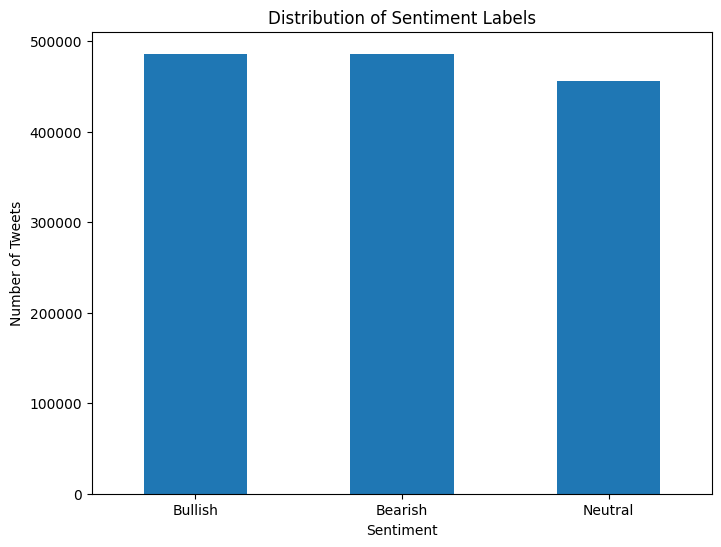

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset


# Display basic information about the dataset
df_info = df.info()
df_head = df.head()
df_describe = df.describe(include='all')

# Check for missing values
missing_values = df.isnull().sum()

# Map the labels for better understanding
label_mapping = {0: "Neutral", 1: "Bullish", 2: "Bearish"}
df['sentiment_label'] = df['sentiment'].map(label_mapping)

# Count of each sentiment label
sentiment_counts = df['sentiment_label'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()



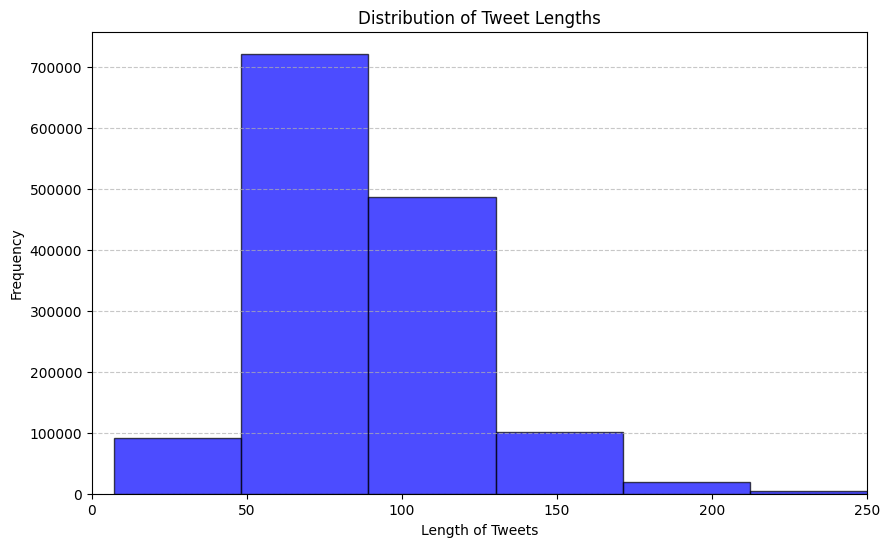

In [30]:
# Length of tweets analysis
df['tweet_length'] = df['tweet'].apply(len)

# Summary statistics for tweet lengths
tweet_length_stats = df['tweet_length'].describe()

# Adjust the x-axis scale and ticks
plt.figure(figsize=(10, 6))
plt.hist(df['tweet_length'], bins=50, alpha=0.7, color='blue', edgecolor='black')  # More bins for finer distribution
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Length of Tweets')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-axis limits and custom ticks
plt.xlim(0, 250)
plt.xticks(ticks=range(0, 251, 50))
plt.show()

In [8]:
# First glance at the tweet data and other basic stats
df_info, df_head, df_describe, missing_values, sentiment_counts, tweet_length_stats


(None,
                                                tweet  sentiment
 0  💰 Cashing out stocks today has left me with a ...          2
 1  💸 Losing half my investments in the last month...          2
 2  📉 Crypto bubble finally bursts! The crypto tra...          2
 3  🔥 The blazing inferno engulfs the stock market...          2
 4  🥶 My stocks are stuck in an icy grip today. Fi...          2,
                                                     tweet     sentiment
 count                                             1428771  1.428771e+06
 unique                                            1428771           NaN
 top     💰 Cashing out stocks today has left me with a ...           NaN
 freq                                                    1           NaN
 mean                                                  NaN  1.020900e+00
 std                                                   NaN  8.118836e-01
 min                                                   NaN  0.000000e+00
 25%              